<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/220728_New_York_City_Airbnb_Open_Data_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 뉴욕시티 에어비앤비 데이터 분석 EDA


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [6]:
# 데이터 다운로드 하는 명령
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 179MB/s]


In [7]:
!unzip '*.zip' -d/content/ch06

Archive:  new-york-city-airbnb-open-data.zip
  inflating: /content/ch06/AB_NYC_2019.csv  
  inflating: /content/ch06/New_York_City_.png  


In [4]:
#파일 불러오고 난 이후에 head, info, describe는 기본적으로 수행
df = pd.read_csv('/content/ch06/AB_NYC_2019.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [5]:
#info의 Non-null count를 통해 널값유무 판단 가능
#사용할 칼럼만 전처리를 진행하고 필요없는 칼럼은 널값있는경우 칼럼 전체 삭제
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df['room_type'].value_counts() #칼럼을 자세히 모르겠을때 어떤 자료인지 판단 
#범주형인걸 알수있음. 원핫인코딩 진행여부 판단.

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [8]:
df.isna().sum() #결측치 갯수

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
(df['reviews_per_month'].isna() & df['last_review'].isna()).sum() #두개 널값이 겹치는 갯수 100% 겹침

10052

In [10]:
df['reviews_per_month'].isna().sum()

10052

In [11]:
(df['number_of_reviews'] == 0 ).sum() #isna() 다른방법

10052

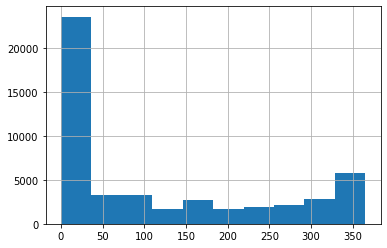

In [12]:
df['availability_365'].hist()

In [13]:
(df['availability_365'] == 0).sum() # 1년 등록일수가 0인 방갯수

17533

In [14]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [15]:
df.drop(['id','name','host_name','latitude','longitude'], axis=1, inplace = True) #필요없는 칼럼 삭제

In [16]:
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


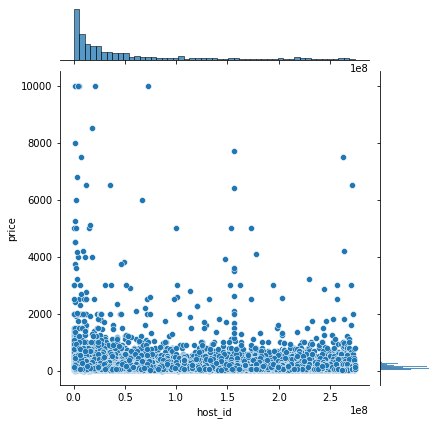

In [17]:
sns.jointplot(x='host_id', y='price', data=df) #호스트 id 별 가격

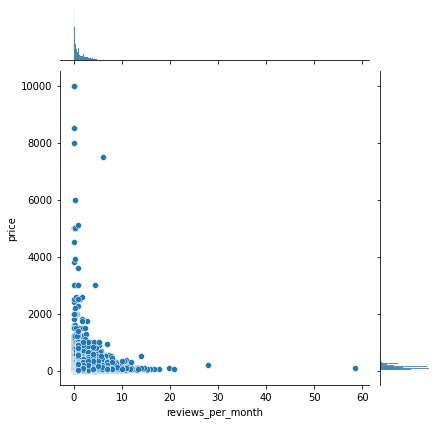

In [18]:
sns.jointplot(x='reviews_per_month', y='price', data=df) #한달 리뷰수와 가격 그래프, 제일 싼거보단, 가성비가 있는게 리뷰가 더 많은 경향

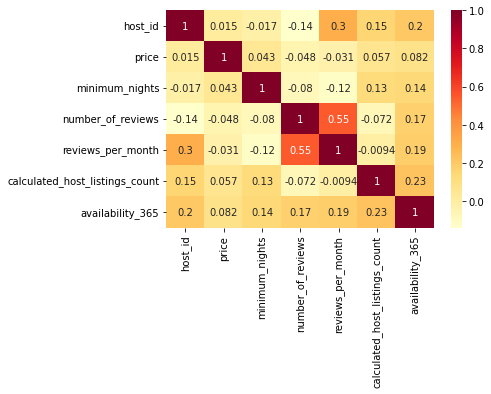

In [19]:
sns.heatmap(df.corr(), annot= True, cmap="YlOrRd") #상관관계 확인 cmap = 컬러, annot은 옆에 범례? 유무 

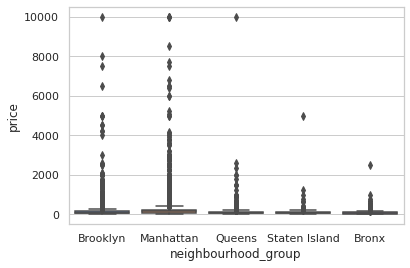

In [37]:
#box plot
sns.boxplot(x='neighbourhood_group', y='price', data=df) # 지역별 가격

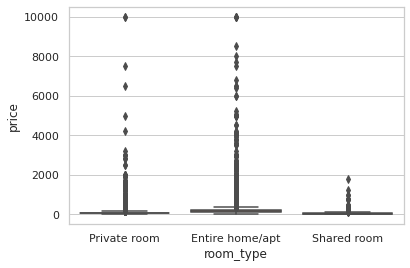

In [38]:
sns.boxplot(x='room_type', y='price', data=df) #방 타입별 가격

## 전처리
 - 미입력데이터와 이상치 제거

In [40]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

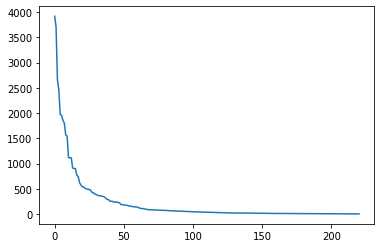

In [25]:
neigh = df['neighbourhood'].value_counts()
plt.plot(range(len(neigh)), neigh)

In [26]:
neigh.sort_values(ascending=False, inplace=True) #ascending = True <- 내림차순
neigh #length는 동네 수, 한개만있는 동네도 있음

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [27]:
neigh.index[50:]

Index(['Boerum Hill', 'Tribeca', 'Kensington', 'Sheepshead Bay',
       'Windsor Terrace', 'Brooklyn Heights', 'Canarsie', 'Forest Hills',
       'Bay Ridge', 'Borough Park',
       ...
       'Howland Hook', 'Lighthouse Hill', 'Silver Lake', 'West Farms',
       'Woodrow', 'Fort Wadsworth', 'Richmondtown', 'New Dorp', 'Rossville',
       'Willowbrook'],
      dtype='object', length=171)

In [28]:
for nehood in range(len(df['neighbourhood'])): # 방갯수 상위 50번째 이후의 동네는 others 라는 동네로 합침
  if str(df.iloc[nehood]['neighbourhood']) in neigh[50:]:
    df.at[nehood,'neighbourhood'] = 'others'

In [29]:
df['neighbourhood'].value_counts()

others                       6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood     

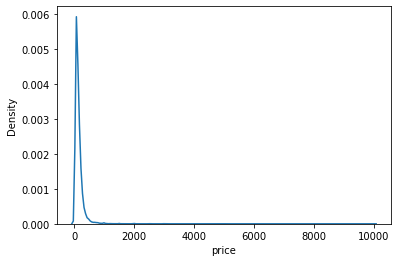

In [30]:
sns.kdeplot(x=df['price']) #가격 분포

In [51]:
print(df['price'].quantile(0.95)) #상위 5% 값
print(df['price'].quantile(0.005)) #하위 0.5% 값

355.0
26.0


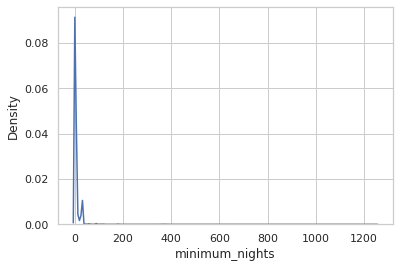

In [52]:
sns.kdeplot(x=df['minimum_nights']) # 커널 밀도함수를 통해 최소숙박일수 이상치 확인

In [31]:
print(df['minimum_nights'].quantile(0.98)) #한달살기까지 인정

30.0


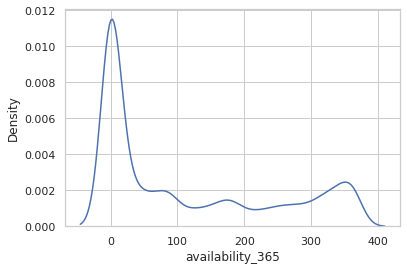

In [55]:
sns.kdeplot(x=df['availability_365']) #일년 이용가능 일수

In [32]:
print(df['availability_365'].quantile(0.3)) # 0일 유령방 제거

0.0


In [33]:
# quantile, drop을 이용하여 outliner 제거
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)
print(p1,p2)

355.0 26.0


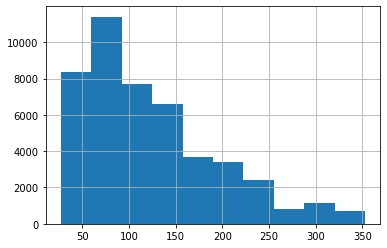

In [34]:
df = df[(df['price'] < p1) & (df['price'] > p2 )] #이상치 제거후 확인

df['price'].hist()

In [35]:
mn1 = df['minimum_nights'].quantile(0.98)
print(mn1)

30.0


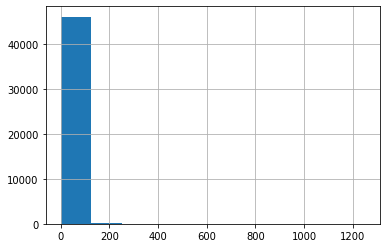

In [36]:
mn1 = df[df['minimum_nights'] < mn1]
df['minimum_nights'].hist()

In [47]:
df['is_avail_zero'] = df['availability_365'].apply(lambda x: \ 'zero' if is x == 0 else 'Nonzero')

SyntaxError: ignored

미기입 누락 데이터 처리하기

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46191 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         46191 non-null  int64  
 1   neighbourhood_group             46191 non-null  object 
 2   neighbourhood                   46191 non-null  object 
 3   room_type                       46191 non-null  object 
 4   price                           46191 non-null  int64  
 5   minimum_nights                  46191 non-null  int64  
 6   number_of_reviews               46191 non-null  int64  
 7   last_review                     37068 non-null  object 
 8   reviews_per_month               37068 non-null  float64
 9   calculated_host_listings_count  46191 non-null  int64  
 10  availability_365                46191 non-null  int64  
 11  is_avail_zero                   46191 non-null  object 
dtypes: float64(1), int64(6), object(

In [39]:
df['reviews_per_month'].head()

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
Name: reviews_per_month, dtype: float64

In [43]:
df['review_exists'] = df['reviews_per_month'].isna().apply(lambda x: \
                                                           'No' if x is True else 'Yes')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46191 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         46191 non-null  int64  
 1   neighbourhood_group             46191 non-null  object 
 2   neighbourhood                   46191 non-null  object 
 3   room_type                       46191 non-null  object 
 4   price                           46191 non-null  int64  
 5   minimum_nights                  46191 non-null  int64  
 6   number_of_reviews               46191 non-null  int64  
 7   last_review                     37068 non-null  object 
 8   reviews_per_month               37068 non-null  float64
 9   calculated_host_listings_count  46191 non-null  int64  
 10  availability_365                46191 non-null  int64  
 11  is_avail_zero                   46191 non-null  object 
 12  review_exists                   

In [52]:
df.fillna(0, inplace=True)

In [53]:
df.isna().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
is_avail_zero                     0
review_exists                     0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46191 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   host_id                         46191 non-null  int64 
 1   neighbourhood_group             46191 non-null  object
 2   neighbourhood                   46191 non-null  object
 3   room_type                       46191 non-null  object
 4   price                           46191 non-null  int64 
 5   minimum_nights                  46191 non-null  int64 
 6   number_of_reviews               46191 non-null  int64 
 7   last_review                     46191 non-null  object
 8   reviews_per_month               46191 non-null  int64 
 9   calculated_host_listings_count  46191 non-null  int64 
 10  availability_365                46191 non-null  int64 
 11  is_avail_zero                   46191 non-null  object
 12  review_exists                   46191 non-null

In [55]:
df1 = df.copy()

In [ ]:
# 원핫인코딩 쉽게 하는 방법
X_cat = df[['neighbourhood_group','neighbourhood',
            'room_type','is_avail_zero', 'review_exists']]
X_cat = pd.get_dummies(X_cat)
X_cat.head()

In [56]:
# # 개어렵게 하는 방법
# def merge_and_get(ldf, rdf, on, how='inner', index=None): 
#   if index is True: 
#     return pd.merge(ldf, rdf, how=how, left_index = True, 
#                     right_index=True)
#   else:
#     return pd.merge(ldf,rdf, how=how,on = on)

In [ ]:
# one_hot_df = merge_and_get(
#   df1, pd.get_dummies(
#     df1['neighbourhood_group'],prefix="neighbourhood_group"), on = None, index=True) 
# one_hot_df = merge_and_get(
#   one_hot_df , pd.get_dummies(
#     df1['neighbourhood'],prefix="neighbourhood"), on = None, index=True) 
# one_hot_df = merge_and_get(
#   one_hot_df , pd.get_dummies(
#     df1['room_type'],prefix="room_type"), on = None, index=True) 
# one_hot_df = merge_and_get(
#   one_hot_df , pd.get_dummies(
#     df1['is_avail_zero'],prefix="is_avail_zero"), on = None, index=True) 
# one_hot_df = merge_and_get(
#   one_hot_df , pd.get_dummies(
#     df1['review_exists'],prefix="review_exists"), on = None, index=True) 
# one_hot_df.head()

In [ ]:
one_hot_df.columns

In [71]:
x_cat = one_hot_df

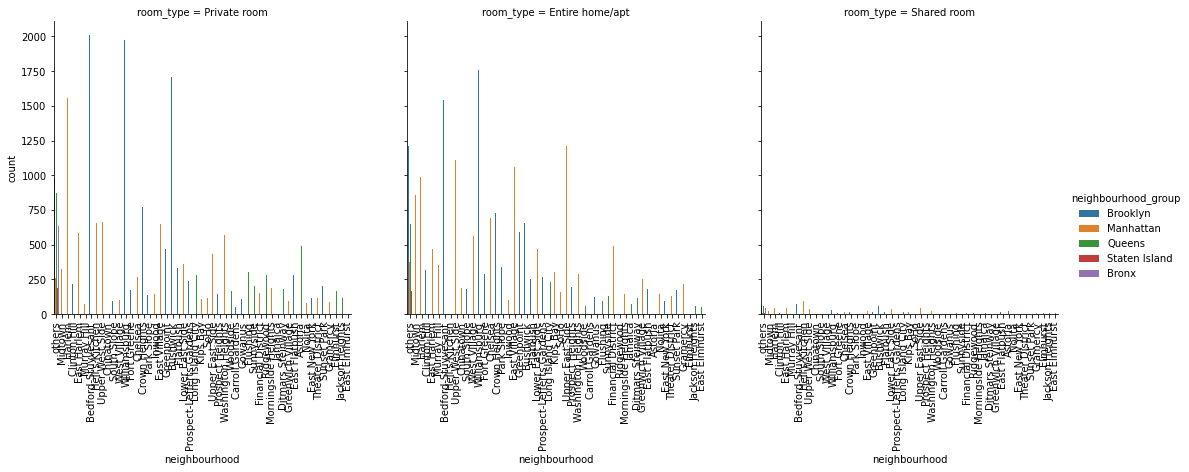

In [72]:
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=x_cat, kind='count')
viz_3.set_xticklabels(rotation=90)

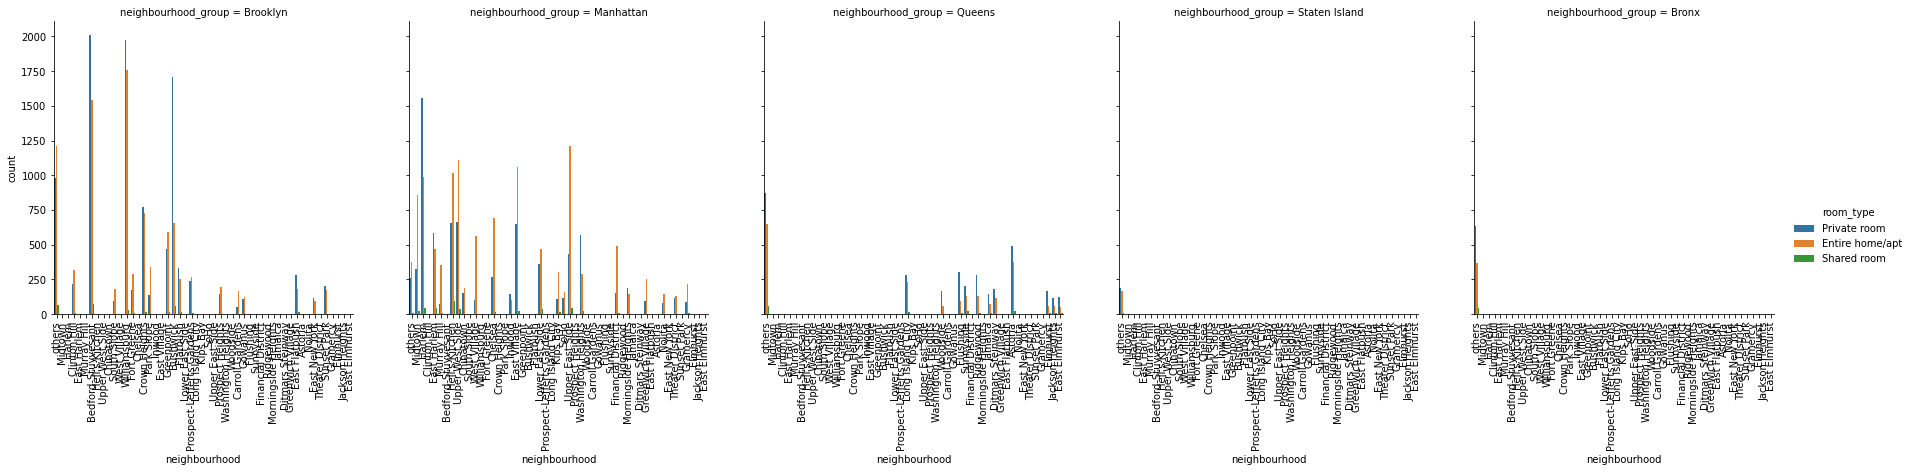

In [75]:
viz_3=sns.catplot(x='neighbourhood', hue='room_type', col='neighbourhood_group', data=x_cat, kind='count')
viz_3.set_xticklabels(rotation=90)

### Standard Scaler를 이용하여 정규 분포

  - StandardScaler
  - SVM이나 선형호귀, 로지스틱 회귀 모델은 데이터 분포가 정규분포를 따른다 가정을 했기 때문에 분포에 맞게 스케일링 해줘야 한다.
  

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'review_exists'],
      dtype='object')

In [79]:
# StanderdScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'price', #정규화 하면 안되는 칼럼들 전부 삭제
                 'last_review','is_avail_zero', 'review_exists'], axis=1 ) 

scaler.fit(X_num) 
X_scaled = scaler.transform(X_num) # 정규화로 변환
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns) #정규화 된 값을 다시 데이터프레임으로 변환
X = pd.concat([X_scaled, X_cat], axis = 1)
y = df['price']

In [81]:
X.head()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avail_zero_Nonzero,is_avail_zero_zero,review_exists_No,review_exists_Yes
0,-0.853543,-0.299122,-0.328687,0.0,-0.022479,1.958770,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
1,-0.853542,-0.299122,0.466593,0.0,-0.150654,1.882068,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,-0.853519,-0.198461,-0.527508,0.0,-0.182698,1.958770,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
3,-0.853516,-0.299122,5.437099,0.0,-0.182698,0.647166,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,-0.853486,0.153849,-0.328687,0.0,-0.182698,-0.840853,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
